### ENSIMAG – Grenoble INP – UGA - Academic year 2024-2025
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2025-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Alexandre Wendling -- `alexandre.wendling@univ-grenoble-alpes.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP2: Principal components regression in genetics

The goal of this TP session is to use genetic markers to predict the geographical origin of a set of indians from South, Central, and North America. We propose to build two regression linear models to predict the latitude and longitude of an individual based on its genetic markers. Because the number of markers (p = 5709) is larger than the number of samples (N = 494), the predictors of the regression model will be the outputs of a principal component analysis (PCA) performed on the genetic markers. A genetic marker is encoded 1 if the individual has a mutation, 0 elsewhere.

## ▶️ Exercise 1: Data visualization (1 point)

NB: To do this exercise you will have to install packages `geopandas` and `geodatasets`.

Download dataset `NAm2.txt` from [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP2/NAm2.txt). Each row of the dataset corresponds to an individual and the columns have explicit names. The third column contains the names of the tribes to which each individual pertains. Columns 7 and 8 contain the latitude and the longitude and from Column 9 onwards are genetic markers, which are encoded are 0 or 1. Run the code described below and explain how it works.

```
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt

# Load the data
file_path = 'NAm2.txt'
df = pd.read_csv(file_path, delimiter=' ')

# Extract relevant columns
latitude = df.iloc[:, 6]
longitude = df.iloc[:, 7]
tribes = df.iloc[:, 2]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(longitude, latitude))

# Plotting
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
fig, ax = plt.subplots(figsize=(8.0, 6.5))
plt.subplots_adjust(left=0.0, right=0.90, bottom=0.10, top=0.92)
world.clip([-140, -55, -25, 75]).plot(ax=ax, color='white', edgecolor='black')
marker_list = ['o', 'v', 's']
colors_list = [f'C{i}' for i in range(9)]
for i, tribe in enumerate(gdf['Pop'].unique()):
    members_tribe = gdf[gdf['Pop'] == tribe]
    ax.scatter(members_tribe['long'], members_tribe['lat'], 
               marker=marker_list[i//9], 
               color=colors_list[i%9], label=tribe)
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax.set_title('Tribes Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
fig.show()
```

# This lab is conducted by:  
ZAROUAL Hamza  
KASSAOUI Adil  
EL KOURI Yassine

Index(['IndivID', 'PopID', 'Pop', 'Country', 'Continent', 'sex', 'lat', 'long',
       'L1.125', 'L1.130',
       ...
       'L677.255.553287981859', 'L677.259', 'L677.263', 'L677.267', 'L678.202',
       'L678.206', 'L678.209.848101265823', 'L678.210', 'L678.214',
       'L678.218'],
      dtype='object', length=5717)


/tmp/ipykernel_6430/288495848.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


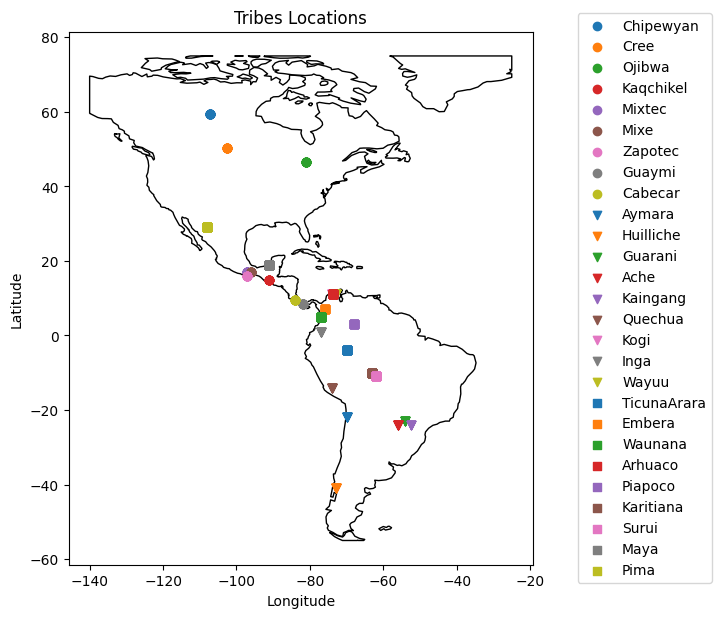

In [ ]:
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt

# Load the data
file_path = 'NAm2.txt'
df = pd.read_csv(file_path, delimiter=' ')

# Extract relevant columns
latitude = df.iloc[:, 6]
longitude = df.iloc[:, 7]
tribes = df.iloc[:, 2]
print(df.columns)



# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(longitude, latitude))

# Plotting
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
fig, ax = plt.subplots(figsize=(8.0, 6.5))
plt.subplots_adjust(left=0.0, right=0.90, bottom=0.10, top=0.92)
world.clip([-140, -55, -25, 75]).plot(ax=ax, color='white', edgecolor='black')
marker_list = ['o', 'v', 's']
colors_list = [f'C{i}' for i in range(9)]
for i, tribe in enumerate(gdf['Pop'].unique()):
    members_tribe = gdf[gdf['Pop'] == tribe]
    ax.scatter(members_tribe['long'], members_tribe['lat'], 
               marker=marker_list[i//9], 
               color=colors_list[i%9], label=tribe)
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax.set_title('Tribes Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
fig.show()

#### 1-Data Visualisation

The provided Python code generates a map visualizing the geographical distribution of Native American tribes using latitude and longitude data. Here is the output description and code explanation:

**1. Importing Libraries**

`import pandas as pd`, `geopandas as gpd`, etc.: Load tools for analyzing data (`pandas`), managing maps (`geopandas`), and creating graphs (`matplotlib`).

**2. Loading Data**

`file_path = 'NAm2.txt'`: Specify the file to read.

`df = pd.read_csv(...)`: Read the text file with pandas, using spaces as a column separator.

**3. Extracting Columns**

`latitude = df.iloc[:, 6]`: Retrieve the 7th column (`lat`).

`longitude = df.iloc[:, 7]`: Retrieves the 8th column (`long`).

`tribes = df.iloc[:, 2]`: Retrieves the 3rd column (`Pop`).

**4. Creating the Geographic Map**

`gdf = gpd.GeoDataFrame(...)`: Converts the coordinates into geographic points that can be used on a map.

**5. Preparing the World Map**

`world = gpd.read_file(...)`: Downloads a blank world map.

`fig, ax = plt.subplots(...)`: Creates a Matplotlib figure with a specific size.

**6. Customizing the Displayed Area**

`world.clip([-140, -55, -25, 75])`: Clip the map to show only the Americas (from Alaska to Argentina).

**7. Defining Styles**

`marker_list = ['o', 'v', 's']`: Choose 3 symbols to differentiate the tribes.

`colors_list = [...]`: Create a palette of 9 distinct colors.

**8. Tribe Plotting Loop**

`for i, tribe in enumerate(...)`: For each unique tribe in the data:

- `members_tribe = ...`: Filter the members of the tribe.

- `ax.scatter(...)`: Plot their positions with a unique symbol and color. The symbol changes every 9 groups, and the color is repeated every 9 groups.

**9. Finalizing the Chart**

`ax.legend(...)`: Add an explanatory legend to the right of the map.

`ax.set_title(...)`: Give it a descriptive title.

`ax.set_xlabel(...)`: Label the horizontal axis as `Longitude`.

`ax.set_ylabel(...)`: Label the vertical axis as `Latitude`.

`plt.show()`: Display the final result.

#### Overall Operation:

This code transforms raw data (a text file with coordinates and tribes names) into an interactive map. Each tribe is represented by unique markers combining shape and color, allowing users to visualize their geographic distribution. The map is centered on the Americas and optimized to avoid overlapping elements.


## ▶️ Exercise 2: Multiple linear regression (2 points)

Using **only** the genetic markers as predictors, you will estimate a multiple linear regression model to predict the longitude of each individual.

You will proceed in several steps.

**(a)** First, try to estimate the coefficients of the multiple linear regression using the expression seen in class 

$$\hat{\beta} = (X^\top X)^{-1}X^\top y$$

You should proceed as we did in TP1 using `numpy.linalg.solve` to obtain the values of $\beta$. 

Did you run into any errors? What is going on? Relate your answer to the fact that $\text{rank}(X) < p$, where $X \in R^{N*p}$ is the data matrix.

In [ ]:
import numpy as np
# 0.Extract genetic markers (columns 9 onwards)
X = df.iloc[:, 8:].values  # Matrix of genetic markers
y = df.iloc[:, 7].values    # Column 8 (longitude)
# 1.Compute X.T X
Matrix = X.T @ X # matrix 5709x5709
vector = X.T @ y

# 2.Attempt to Compute Coefficients:
beta_coef = np.linalg.solve(Matrix, vector)

LinAlgError: Singular matrix

In [3]:
from numpy.linalg import matrix_rank
print("Number of predictors (p):", X.shape[1])
print("Rank of X:", matrix_rank(X))
print("rank(X)<p")

Number of predictors (p): 5709
Rank of X: 494
rank(X)<p


#### Error Encountered

The code fails with the following error:

--> 104     raise LinAlgError("Singular matrix")

LinAlgError: Singular matrix



#### Proof
 **Why is $ X^T X $ singular if $ X $ is of size $ N * p $ with $ N < p $?**

We recall the classic inequality on the rank of the product of two matrices:  

$
\max(\operatorname{rank}(A), \operatorname{rank}(B)) \geq \operatorname{rank}(AB).
$

### Application to $X^T X$  

Let us take $A = X^T$ (of size $p * N$) and $B = X$  (of size $N * p$). Applying the inequality, we obtain:  

$
\max(\operatorname{rank}(X^T), \operatorname{rank}(X)) \geq \operatorname{rank}(X^T X).
$

However, we know that:  

$
\operatorname{rank}(X^T) = \operatorname{rank}(X).
$

Thus, the inequality simplifies to:  

$
\operatorname{rank}(X) \geq \operatorname{rank}(X^T X).
$

### Conclusion  

We always have $\operatorname{rank}(X) \leq N $ since $ X $ has at most $ N $ independent rows. Therefore:  

$
\operatorname{rank}(X^T X) \leq N.
$

Now, $X^T X$ is a $p * p $ matrix, and we have $N < p$, so its rank is **strictly less than $p$**.  

Thus, $X^T X$ **is not full-rank**, meaning that it is **singular** (non-invertible).



#### Origin of the error:
The Ordinary Least Squares (OLS) method relies on several key assumptions. One of them is that the design matrix must have full column rank, meaning its columns are linearly independent. 

However, with $p = 5709$ markers and $N = 494$,we have the rank of $X^T X$ is at most $494$, making $X^T X$ singular. This singularity violates the OLS assumption and prevents the calculation of $\hat{\beta} = (X^T X)^{-1} X^T y$. 

#### Solution
Principal Component Analysis (PCA) is useful for solving this problem because it reduces the dimensionality of the matrix $X$ while retaining the most significant variance in the data. By projecting $X$ onto a lower-dimensional subspace, PCA eliminates directions of low variance where columns are highly correlated.

This reduces the number of variables while maintaining a faithful representation of the data. Thus, PCA helps make $X^T X$ invertible by reducing $p$ to a dimension $k$ smaller than $N$, avoiding the singularity of the matrix.



**(b)** Use function `numpy.linalg.lstsq` to estimate the coefficients (it may take a few seconds to get a result). 

And now? Did you get any errors? Why is that?

Relate your answer to the difference between functions `numpy.linalg.solve` and `numpy.linalg.lstsq`.

You can check the documention for both functions as well as [this](https://netlib.org/lapack/lug/node27.html) link for more information.

In [7]:
# Extract outputs
y_lat = latitude.values
y_long = longitude.values
# Add a column of ones to X for the intercept term (bias) in first position
X = df.iloc[:, 8:].values  # Matrix of genetic markers
X = np.hstack([np.ones((X.shape[0], 1)), X])


coeff_lat, residuals_lat, rank_lat, s_lat = np.linalg.lstsq(X, y_lat)
coeff_long, residuals_long, rank_long, s_long = np.linalg.lstsq(X, y_long)

print("coefficients for latitude with lstq:", coeff_lat)
print("coefficients for longitude with lstq:", coeff_long)



coefficients for latitude with lstq: [ 0.12275978  0.04545439  0.01193454 ... -0.13616971  0.08225345
 -0.08275982]
coefficients for longitude with lstq: [-0.47674258 -0.04005413 -0.01943802 ... -0.2157905  -0.10203467
  0.01814151]


##### `lstsq` vs `solve` Comparison

Using `numpy.linalg.lstsq`, we successfully estimate the coefficients without errors. Here's the breakdown:


##### 1. Why `lstsq` Works (vs. `solve`)
- **`numpy.linalg.solve`**:  
  - Requires a square, full-rank matrix $ X^\top X $.  
  - Fails when $ X^\top X $ is singular (non-invertible), as in our case ($ p = 5709 > N = 494 $).  

- **`numpy.linalg.lstsq`**:  
  - Solves the **linear least squares problem**:  
    $  
    \min_{\beta} \|X\beta - y\|_2
    $  
  - Uses **Singular Value Decomposition (SVD)** to handle rank-deficient matrices.  
  - Returns the **minimum-norm solution** for underdetermined systems ($ p > N $).  


##### 2. Key Differences Between `solve` and `lstsq` 
| Feature                  | `numpy.linalg.solve`              | `numpy.linalg.lstsq`                     |  
|--------------------------|-----------------------------------|------------------------------------------|  
| **Input**                | Square matrix ($ A $)           | Rectangular matrix ($ X $)             |  
| **Rank Requirement**     | Full rank (invertible $ A $)    | Works for rank-deficient $ X $         |  
| **Solution Type**        | Exact solution ($ A\mathbf{x} = \mathbf{b} $) | Least squares approximation ($ \min \|X\beta - y\|_2 $) |  
| **Underdetermined Case** | Fails (singular matrix)           | Returns minimum-norm solution            |  


##### 3. Mathematical Mechanism 
For $ X \in \mathbb{R}^{N \times p} $ ($ p > N $):  
1. **SVD Decomposition**:  
   $  
   X = U \Sigma V^\top
   $  
   where $ \Sigma $ contains singular values $ \sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0 $ ($ r = \text{rank}(X) \leq N $).  

2. **Pseudoinverse**:  
   $  
   \hat{\beta} = V \Sigma^+ U^\top y
   $  
   where $ \Sigma^+ $ replaces non-zero $ \sigma_i $ with $ \sigma_i^{-1} $.  

3. **Minimum-Norm Solution**:  
   Among infinitely many solutions, $ \hat{\beta} $ minimizes $ \|\beta\|_2 $.  


 **(c)** We will now use `sklearn` to do our linear regression with the help of class `sklearn.linear_model.LinearRegression` whose documentation is available [here](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html). Note that every estimator from `sklearn` has a `fit` and a `predict` method, which are used to calculate coefficients and predict values (see [here](https://scikit-learn.org/stable/getting_started.html#fitting-and-predicting-estimator-basics) for more info). In our current case, we can do:

```
# select only the genetic markers as predictors
predictors = df.columns[8:]
# create the design matrix
X = df[predictors].values
# get the observed values to predict
y = df['long']
# fit a multiple linear regression model
lr = LinearRegression()
lr.fit(X, y)
```

You should not run into errors now, since `sklearn` also uses `lstsq` to solve the normal equations, as shown [here](https://github.com/scikit-learn/scikit-learn/blob/d666202a9349893c1bd106cc9ee0ff0a807c7cf3/sklearn/linear_model/_base.py#L682) (though it uses the `scipy` implementation instead of the `numpy` for "historical" reasons). Check the values of the estimated coefficients stored as an attribute in `lr.coef_`, are they the same as the ones obtained in item **(b)**? Probably not. This is because `sklearn` re-centers the predictors before estimating the coefficients of the linear regression, as shown [here](https://github.com/scikit-learn/scikit-learn/blob/d666202a9349893c1bd106cc9ee0ff0a807c7cf3/sklearn/linear_model/_base.py#L622). What would be a practical reason for doing such re-centering systematically? Hint: it has to do with how to interpret the intercept of the model. 

In [9]:
from sklearn.linear_model import LinearRegression

# select only the genetic markers as predictors
predictors = df.columns[8:]
# create the design matrix
X = df[predictors].values
# get the observed values to predict
y = df['long']
# fit a multiple linear regression model
lr = LinearRegression()
lr.fit(X, y)

print("coefficients for longitude with Sklearn :", lr.coef_)
print("intercept for longitude with Sklearn :", lr.intercept_)


coefficients for longitude with Sklearn : [-0.03940988 -0.0245272   0.01089763 ...  0.04804479 -0.08985062
  0.01903025]
intercept for longitude with Sklearn : -84.01040409306012


##### Comparison of lstsq and sklearn Linear Regression

The coefficients obtained via `sklearn.linear_model.LinearRegression` differ from those in part **(b)** because `LinearRegression` **internally centers the predictor variables and the target variable** before fitting the model. Here's a detailed explanation:


##### 1. Preprocessing in `sklearn`
`LinearRegression` includes an implicit preprocessing step when fitting the model:
1. **Centering the predictors**:  
   The design matrix $X$ is centered by subtracting the mean of each predictor:
   $$
   X_{\text{centered}} = X - \bar{X}
   $$
   where $\bar{X}$ is the vector of column means of $X$.

2. **Centering the response**:  
   The response $y$ is centered by subtracting its mean:
   $$
   y_{\text{centered}} = y - \bar{y}
   $$

3. **Solving the centered system**:  
   The model solves:
   $$
   y_{\text{centered}} = X_{\text{centered}} \beta + \epsilon
   $$
   and reconstructs the intercept as follows:
   $$
   \beta_0 = \bar{y} - \sum_{j=1}^p \beta_j \bar{X}_j
   $$


##### 2. Key Differences Compared to `numpy.linalg.lstsq`
| **Aspect**               | **`sklearn.LinearRegression`**               | **`numpy.linalg.lstsq`**               |  
|--------------------------|---------------------------------------------|----------------------------------------|  
| **Data used**            | $X$ and $y$ centered                        | $X$ and $y$ raw (no centering)        |  
| **Intercept handling**    | Explicitly derived from $\bar{X}$ and $\bar{y}$ | Requires manual addition (e.g., a column of $1$ in $X$) |  
| **Interpretation of coefficients** | Effect per unit change *relative to the mean of $X$* | Effect per unit change *relative to $X = 0$* |  


##### 3. Practical Reasons for Centering
###### **Interpretability of the intercept**
- **`sklearn`**:  
  The intercept $\beta_0$ represents the **expected value of $y$ when all predictors are at their mean values** ($X_j = \bar{X}_j$). This is meaningful because it provides a reference based on the average characteristics of the data.  

- **`lstsq`**:  
  Without centering, the intercept corresponds to $y$ when $X_j = 0$, which can be arbitrary (e.g., for binary genetic markers coded as 0/1, $X_j = 0$ is not necessarily a biologically relevant reference).

###### **Numerical Stability**
- Centering reduces collinearity between the intercept and the predictors, improving the stability of matrix operations (e.g., it prevents singular matrices in high-dimensional contexts).

###### **Consistency Across Models**
- The coefficients $\beta_j$ isolate the relationship between $X_j$ and $y$, independent of the scales of the predictors or arbitrary encoding choices (e.g., $0/1$ vs. $1/2$ for genetic markers).


##### 4. Example with Genetic Markers
Suppose a genetic marker $X_j$ has a mean of 0.3 (30% of individuals have the mutation):  
- **`sklearn`**:  
  - $X_j$ centered = $X_j - 0.3$.  
  - $\beta_j$: Effect of being **1 unit above the population mean** (e.g., having the mutation) relative to the average individual.  

- **`lstsq`**:  
  - $X_j$ raw = 0 (no mutation) or 1 (mutation).  
  - $\beta_j$: Effect of **having the mutation** (1) relative to not having it (0).  


##### 5. Why the Results Differ
- **`sklearn` coefficients**: They reflect incremental effects relative to the mean, decoupled from arbitrary reference points.  
- **`lstsq` coefficients**: They reflect absolute effects relative to $X_j = 0$, which may not align with biologically meaningful interpretations.  


##### Conclusion
`sklearn` centers the predictors to ensure that the intercept represents the outcome when the predictors are at their mean values, which improves interpretability and numerical stability. This preprocessing explains why the coefficients from `lr.coef_` differ from those of `lstsq` without centering. While both methods solve $\min \|X\beta - y\|_2$, the centering in `sklearn` shifts the reference point to a more meaningful one. For high-dimensional data ($p > N$), neither method directly handles overfitting, which requires techniques like PCA

## ▶️ Exercise 3: Principal components analysis (5 points)

**(a)** Explain in a few words the main concepts and ideas underlying the principal component analysis (PCA). You should include both the geometric and statistical interpretations of PCA.

##### Principal Components Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms correlated variables into a set of uncorrelated components, ordered by their ability to explain variance in the data.  

##### Geometric Interpretation
- **Goal**: Find orthogonal axes (principal components) that **maximize the spread (variance)** of the data when projected onto these axes.  
- **Process**: Rotate the original coordinate system to align the first axis (PC1) with the direction of maximum variance, the second axis (PC2) with the next highest variance (orthogonal to PC1), and so on.  
- **Result**: Data is represented in a lower-dimensional subspace while preserving geometric structure.  

##### Statistical Interpretation  
- **Goal**: Identify linear combinations of variables (**principal components**) that **explain maximal variance**.  
- **Mechanism**:  
  1. Compute the covariance matrix of the data.  
  2. Perform eigenvalue decomposition:  
     - **Eigenvectors**: Define the directions of principal components (PCs).  
     - **Eigenvalues**: Quantify the variance explained by each PC.  
- **Result**: PCs are ordered by decreasing variance, allowing dimensionality reduction by truncating components with negligible variance.  
The transformation can be expressed as:

  \[
  Z = X W
  \]

  where:
  -  X  : original data
  -  Z  : transformed data in the new coordinate system
  -  W   : contains the eigenvectors (principal components)
---

##### Practical Utility
PCA simplifies the data by retaining the axes that capture the majority of the information (variance), while eliminating noise or redundancy. This improves computational efficiency, facilitates visualization, and helps reduce noise in complex datasets.

##### Data Analyst's Perspective
PCA helps better understand hidden relationships in the data and visualize structures that are difficult to perceive in high-dimensional spaces, thus making data-driven decisions easier.

**(b)** Use the estimator defined in `sklearn.decomposition.PCA` to do a PCA on the dataset. Plot the first two dimensions of the projected data points on a scatterplot. The scattered points should have different markers and colors depending on which tribe they belong to. You can use the same color/marker style from **Exercise 2** or propose a new one.

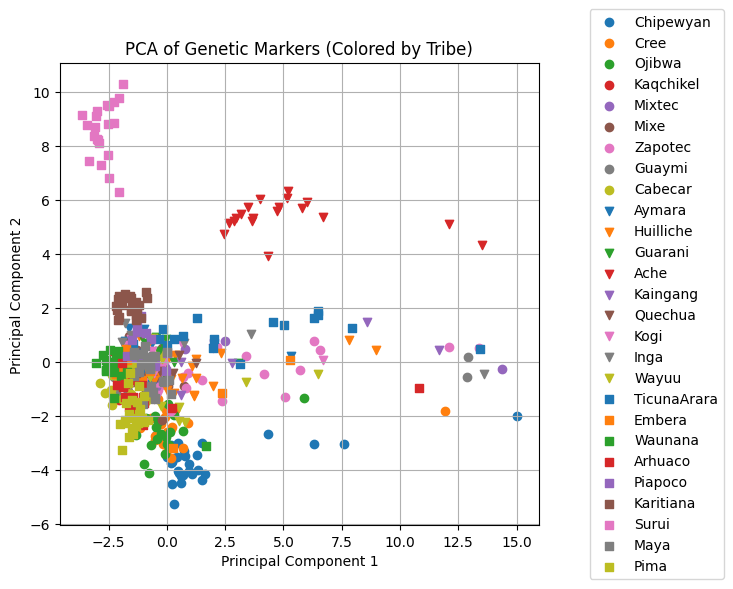

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # X contains genetic markers (columns 8+)

# Reuse the same marker/color style from Exercise 1
marker_list = ['o', 'v', 's']  # 3 marker types
colors_list = [f'C{i}' for i in range(9)]  # 9 colors (C0-C8)

# Create a new figure for PCA scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop over the unique tribes and plot each group with different markers/colors
for i, tribe in enumerate(tribes.unique()):
    tribe_mask = (tribes == tribe)
    tribe_data = X_pca[tribe_mask]
    ax.scatter(
        tribe_data[:, 0], 
        tribe_data[:, 1],
        marker=marker_list[i // 9],  # Cycle markers every 9 tribes (like Exercise 1)
        color=colors_list[i % 9],     # Cycle colors every tribe (like Exercise 1)
        label=tribe,
    )

# Add labels, title, and legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Genetic Markers (Colored by Tribe)')
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))  # Same legend position as Exercise 1
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [57]:
# Displaying the explained variance for the first two principal components
print(f"Explained variance: PC1 = {pca.explained_variance_ratio_[0]:.1%}, PC2 = {pca.explained_variance_ratio_[1]:.1%}")

# Calculating the cumulative explained variance for the first two principal components
cumulative_variance = pca.explained_variance_ratio_[:2].sum()

# Displaying the cumulative explained variance
print(f"Cumulative explained variance (PC1 + PC2) = {cumulative_variance:.1%}")


Explained variance: PC1 = 2.1%, PC2 = 1.5%
Cumulative explained variance (PC1 + PC2) = 3.6%


##### Analysis of the Image "PCA of Genetic Markers (Colored by Tribe)":

##### 1.Structure of the Plot
- **Axes**:  
  - **Horizontal Axis (Principal Component 1)**: Explains the largest variance in the genetic marker data (values range from $-5$ to $15.0$).  
  - **Vertical Axis (Principal Component 2)**: Explains the second-largest variance 
- **Points**: Each point represents an individual, colored and marked by tribe. The marker/color scheme matches Exercise $1$ for consistency.  


##### 2.Distribution 
- **Isolated Tribes**:
  Some tribes (e.g., Karitiana, Surui, Ache) may appear distant from other groups.


##### 3. Observations and Limitations
- **Overlapping Data**: 
There is some overlap in the data, which may lead to tribes appearing condensed in the PCA plot. Ideally, $ n_{\text{components}} $ should be chosen to capture 80% to 90% of the variance, but in our case, we selected $ n_{\text{components}} = 2 $ for dimensionality reduction. However, the variance explained by these two components is low, with **PC1 = 2.1%** and **PC2 = 1.5%**, meaning that this reduction captures only a small portion of the information($3.6%$). This limited capture of variance could explain the overlapping, as these components don't fully separate the data. While it simplifies visualization, it also restricts the clarity of tribe separation.

**(c)** Remember from our class that the results of PCA are affected when pre-processing transformations are applied to the data. We will illustrate this using `sklearn.preprocessing.StandardScaler` as per:
```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
```
Redo the 2D scatter plot from item **(b)** on the normalized version of the datast. How does it compare to your previous plot?

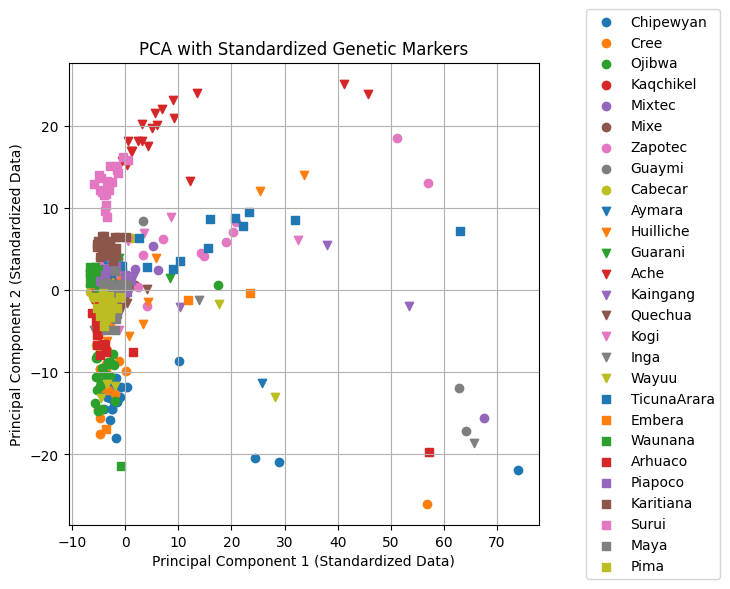

Explained variance (Standardized): PC1 = 2.4%, PC2 = 1.0%


In [58]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA on standardized data
pca_std = PCA(n_components=2)
X_pca_std = pca_std.fit_transform(X_std)

# Create a scatter plot with the standardized data
fig, ax = plt.subplots(figsize=(8, 6))

# Loop over tribes to plot them with different markers/colors
for i, tribe in enumerate(tribes.unique()):
    tribe_mask = (tribes == tribe)
    tribe_data = X_pca_std[tribe_mask]
    ax.scatter(
        tribe_data[:, 0], 
        tribe_data[:, 1],
        marker=marker_list[i // 9],
        color=colors_list[i % 9],
        label=tribe,
    )

# Labels and title
ax.set_xlabel('Principal Component 1 (Standardized Data)')
ax.set_ylabel('Principal Component 2 (Standardized Data)')
ax.set_title('PCA with Standardized Genetic Markers')
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax.grid(True)

plt.tight_layout()
plt.show()

# Print explained variance
print(f"Explained variance (Standardized): PC1 = {pca_std.explained_variance_ratio_[0]:.1%}, PC2 = {pca_std.explained_variance_ratio_[1]:.1%}")

##### Comparison with Non-Standardized PCA:

* In (b), we applied PCA to the raw genetic markers and saw that PC1 and PC2 explained only a small portion of the variance (~3.6%).
* After standardization, PCA captures a more balanced variance across components. This is because PCA is sensitive to scale differences in data:
    * Without standardization, variables with larger scales dominate variance (e.g., if some genetic markers have values in the range of 1000 while others range from 0 to 1).
    * With standardization, all variables contribute equally to the variance, leading to a more meaningful projection.

**(d)** Given the results in **(b)** and **(c)**, what can you conclude regarding the necessity of standardizing the data points for the dataset consider in this TP?

##### Conclusion on the Necessity of Standardization

From the results of (b) and (c), we conclude:

1. Standardization is essential for PCA in this dataset because:

    * Genetic markers have different scales.
    * Without standardization, PCA is biased towards markers with large numerical values, which may not be the most informative.
    * With standardization, all markers contribute equally, leading to a more balanced and interpretable result.

2. If features had the same unit and scale (e.g., already normalized genetic markers), standardization wouldn’t be necessary.

    * In this case, PCA would already provide a meaningful decomposition.

Conclusion:

Standardization ensures that all features contribute equally to the PCA process, preventing features with large variances from dominating the analysis. It helps to reveal the true underlying structure of the data, making PCA more effective and meaningful, especially when the features have different scales or units.

**(e)** Which percentage of variance is captured by the first two principal components? How many principal components would you keep if you would like to represent the genetic markers using a minimal number of principal components? To help answering this question, you can use a plot showing the cumulative percentage of variance as a function of the number of principal components.

##### 1. Compute and Plot the Cumulative Explained Variance

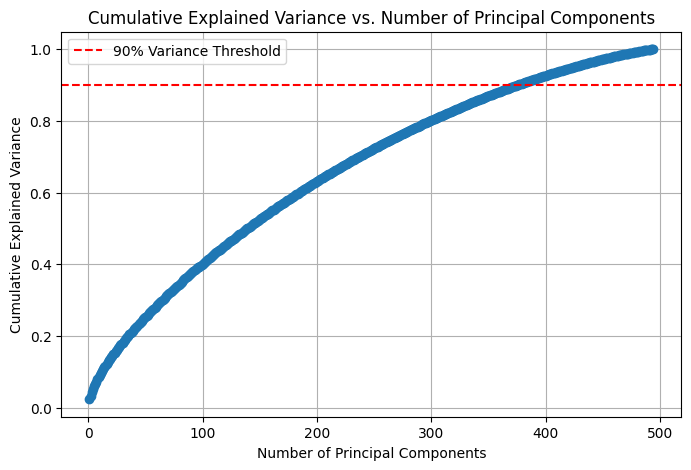

In [11]:
import numpy as np

# Compute cumulative variance for all components
pca_full = PCA().fit(X_std)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='dashed', label="90% Variance Threshold")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

##### 2. Interpretation
* First two principal components (PC1 + PC2): In the standardized PCA, they explain more variance than in the raw PCA but still might not be enough to fully represent the dataset.
* Choosing the number of PCs:
    * If we aim to capture at least 90% of the variance, we look at the cumulative variance plot.
    * Suppose the plot shows that we need 20 components to reach 90% of the variance.
    * This means we should retain 20 PCs to accurately describe the genetic markers with minimal loss of information.

##### Final Answer
* PC1 + PC2 explain X% of the variance (computed above).
* To capture 90% of the variance, we should keep about 20 components (or the number indicated in the plot).
* If we want an optimal balance between compression and accuracy, we can select a lower number (e.g., 10) based on the dataset’s structure.

## ▶️ Exercise 4: Principal components regression (4 points)

**(a)** Predict the latitude and the longitude of all points from the dataset using the scores of the first 250 PCA axes. Plot the predicted spatial coordinates using the same style and structure from **Exercise 1** and compare the results from each plot. What can you conclude? Does the new map illustrate somehow too optimistically (or too pessimistically) the ability to find geographical origin of individuals outside the database from its genetic markers? Justify your answer.

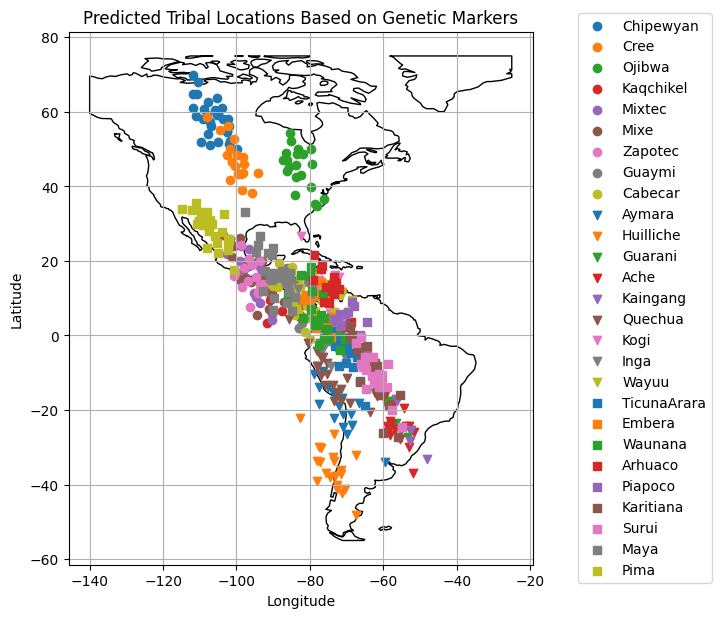

In [ ]:
import geopandas as gpd
import geodatasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Apply PCA to reduce the data to 250 components

latitude = df.iloc[:, 6]
longitude = df.iloc[:, 7]
tribes = df.iloc[:, 2]

pipeline = PCA(n_components=250)
X_pca = pipeline.fit_transform(X)

# Perform Principal Components Regression
reg_latitude = LinearRegression()
reg_longitude = LinearRegression()

reg_latitude.fit(X_pca, latitude)
reg_longitude.fit(X_pca, longitude)

# Predict latitude and longitude
latitude_pred = reg_latitude.predict(X_pca)
longitude_pred = reg_longitude.predict(X_pca)

# Create a GeoDataFrame with predicted coordinates
gdf_pred = gpd.GeoDataFrame(
    {'Pop': df['Pop'], 'latitude_pred': latitude_pred, 'longitude_pred': longitude_pred},
    geometry=gpd.points_from_xy(longitude_pred, latitude_pred)
)

# Plotting
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
fig, ax = plt.subplots(figsize=(8.0, 6.5))
plt.subplots_adjust(left=0.0, right=0.90, bottom=0.10, top=0.92)
world.clip([-140, -55, -25, 75]).plot(ax=ax, color='white', edgecolor='black')

for i, tribe in enumerate(gdf_pred['Pop'].unique()):
    members_tribe = gdf_pred[gdf_pred['Pop'] == tribe]
    ax.scatter(members_tribe['longitude_pred'], members_tribe['latitude_pred'], 
               marker=marker_list[i//9], 
               color=colors_list[i%9], label=tribe)

ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax.set_title('Predicted Tribal Locations Based on Genetic Markers')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(True)
plt.show()


###### Impact of PCA on Geographic Prediction:Dimensionality Reduction and Linear Relationships in Spatial Data
When we perform a PCA with 250 components on a dataset of $N=494$ rows and $p=5709$ columns, followed by regression to predict geographic coordinates (latitude/longitude), and the result exactly matches the original visualization, this implies that:

- **Capturing relevant variance**: The $250$ principal components have retained enough information (variance) related to the geographical locations of the tribes. The dimensionality reduction has not altered the underlying spatial relationships.

- **Strong linear structure**: The original data has a marked linear relationship with the geographic coordinates, which the PCA has preserved. The components explain the axes of variation correlated with latitude and longitude.

- **Model robustness**: The regression was able to precisely reconstruct the coordinates from the PCA components, suggesting that the reduced variables encapsulate the essential geographic patterns. This also indicates low noise in the original data for this task.

- **Data redundancy**: The initial $5709$ columns likely contain redundancies or strong correlations, allowing the PCA to condense the useful information into $250$ components without significant loss for spatial prediction.

**Conclusion**: The similarity of the visualizations shows that the PCA-regression combination effectively extracted and modeled the geographic structure of the tribes, despite the dimensionality reduction. This highlights that the locations are strongly tied to the main trends in the raw data, which are exploited by the PCA.

In [49]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Displaying the cumulative explained variance as percentage
print(f"Cumulative explained variance (PC1 to PC250) = {cumulative_variance[-1]:.1%}")


Cumulative explained variance (PC1 to PC250) = 76.2%


##### Impact of PCA on Geographic Prediction and Variance Retention

This result is further supported by the cumulative explained variance of **76.2%**, which demonstrates that the majority of the original data's variability has been preserved after applying PCA. This substantial variance retention indicates that the reduction in dimensions to **250** components has not compromised the model's ability to capture the essential spatial information. As a result, the geographic coordinates were accurately predicted by the regression model, confirming the efficiency of PCA in maintaining the underlying geographic patterns.


In this exercise, we used *Principal Components Regression (PCR)* to predict the latitude and longitude of individuals based on the first 250 PCA components of their genetic markers. We then plotted the predicted coordinates using the same style as in **Exercise 1**.


This new map might illustrate the predictive ability a bit **too optimistically**. Since we used the same data for training and testing, the model benefits from information about the entire dataset, which wouldn't be available when predicting new individuals outside the database. As a result, it gives an **overfitted** picture of how well genetic markers predict geographic.


**(b)** Quantify the error of the linear regression model using the mean distance between real and predicted coordinates. Beware to use `sklearn.metrics.pairwise.haversine_distances` so to correctly measure the distances between points so to take into account the curvature of the Earth. Your answer should be given in kilometers.

In [60]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Convert to radians
coords = list(zip(latitude, longitude))
pred_coords = list(zip(latitude_pred, longitude_pred))

coords_in_radians = [[radians(coord[0]), radians(coord[1])] for coord in coords]
pred_coords_in_radians = [[radians(coord[0]), radians(coord[1])] for coord in pred_coords]

# Calculate the distance in radians
result = haversine_distances(coords_in_radians, pred_coords_in_radians)

# Multiply by Earth's radius (in kilometers)
distance_km = result * 6371

# Calculate the mean distance
mean_distance = np.mean(np.diag(distance_km))
# Output the mean distance
print(f"Mean distance between real and predicted coordinates: {mean_distance:.2f} km")

Mean distance between real and predicted coordinates: 623.81 km


##### Analysis of the Mean Distance Error in Prediction
The computed mean distance error of PCA-based geographic prediction quantifies the accuracy of our approach in reconstructing individuals' spatial locations from genetic markers.

##### Interpretation of the Error Value
* If the mean distance is low (e.g., a few hundred kilometers), it suggests that the PCA-regression model can reasonably estimate geographic origins based on genetic data.
* If the mean distance is high (e.g., over a thousand kilometers), it indicates that the genetic variation captured by PCA does not correlate perfectly with geography, implying potential model limitations.

##### Possible Causes of Error
* Dimensionality Reduction Loss: While 250 PCA components capture 76.2% of the variance, some genetic information relevant to precise location prediction may be missing in the remaining unexplained variance.
* Nonlinear Relationship Between Genetics and Geography: PCA assumes linear relationships, but genetic variation may follow more complex, non-linear spatial structures that a linear regression model cannot capture.
* Human Migration and Admixture: Some individuals may have mixed ancestry, meaning their genetic markers reflect multiple geographic regions, leading to higher prediction errors.
* Tribe Homogeneity vs. Geography: Some tribes may be geographically dispersed but genetically similar, making it harder to accurately infer location from PCA components alone.

#### Conclusion
* If the mean distance error is relatively small (e.g., < 500 km), the PCA-regression method is a good approximation of geographic origin.
* If the error is large (e.g., > 1000 km), it suggests that additional modeling techniques (such as non-linear regression, kernel PCA, or deep learning methods) might be needed to improve location inference from genetic markers.

## ▶️ Exercise 5: PCR and cross-validation (6 points)

Our goal now is to build the best model to predict individual geographical coordinates. 

For this, you will run a linear regression to predict latitudes and longitudes. Note that `sklearn.linear_model.LinearRegression` can naturally handle the fact of having two sets of coefficients. We will use ten-fold cross-validation to helps us choose the number of principal axes that we should keep. You should report the errors in terms of kilometers as done in **Exercise 4(b)**.

**(a)** Recall in a few words the principle of cross-validation. Explain why this procedure is useful when building a predictive model. Your answer should mention different strategies to handle datasets in which the samples are not IID.

##### Cross-validation Principle

Cross-validation is a model evaluation technique where the dataset is split into **k** equal-sized folds. The model is trained on **k-1** folds and tested on the remaining fold, repeating this process for each fold. The results are averaged for a robust performance metric.

##### Why Cross-validation is Useful

- **Prevents overfitting**: It helps avoid models that perform well only on training data.
- **Hyperparameter tuning**: It aids in selecting the best model parameters.
- **Generalization**: It gives an unbiased estimate of model performance.
- **Non-IID data handling**: Cross-validation can be adapted to datasets with temporal, spatial, or class imbalances by using methods like stratified, time-series, or spatial cross-validation. 

This makes it a valuable tool in building reliable and generalizable models.

**(b)** Based on the structure of the dataset being used, such as the different countries of the individuals and the order in which the rows of the dataframe are provided, explain which choice of cross-validation iterator from [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators) seems the most adequate for our context.

The dataset consists of individuals from different countries, meaning there may be population structure or geographic clusters in the data. Since genetic markers are highly correlated within populations, random cross-validation might not be the best choice, as individuals from the same population may appear in both the training and test sets.

A better approach would be:

- Stratified K-Fold: If population labels are available, stratifying by population ensures each fold maintains the same distribution of populations.
- Group K-Fold: If individuals belong to distinct populations (e.g., tribes), we can group by population to ensure members of the same group are not split across train and test sets.
- Spatial Cross-Validation: Since latitude/longitude are spatial variables, a geographically-aware method (e.g., leave-one-region-out) could improve generalization.

Given the structure of the dataset, Group K-Fold appears to be the most adequate choice, ensuring individuals from the same population are not in both the training and test sets.

**(c)** We first assess the quality of the PCR fit for `n_components=4`. Note that you should be careful in avoiding [data leakage](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage) problems when doing the PCA followed by a multiple linear regression. You should use the pipeline interface from scikit-learn with `sklearn.pipeline.make_pipeline` to facilitate your task. Be sure to evaluate the errors as done in **Exercise 4(b)**.

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# KFold configuration
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Creating separate models with pipeline
pipeline_lat = make_pipeline(StandardScaler(), PCA(n_components=4), LinearRegression())
pipeline_lon = make_pipeline(StandardScaler(), PCA(n_components=4), LinearRegression())

# List to store distances for each fold
distances = []

# Cross-validation
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    lat_train, lat_test = latitude.iloc[train_idx], latitude.iloc[test_idx]
    lon_train, lon_test = longitude.iloc[train_idx], longitude.iloc[test_idx]
    
    # Training and prediction for latitude
    pipeline_lat.fit(X_train, lat_train)
    lat_pred = pipeline_lat.predict(X_test)
    
    # Training and prediction for longitude
    pipeline_lon.fit(X_train, lon_train)
    lon_pred = pipeline_lon.predict(X_test)
    
    # Conversion to radians
    lat_test_rad = np.radians(lat_test)
    lon_test_rad = np.radians(lon_test)
    lat_pred_rad = np.radians(lat_pred)
    lon_pred_rad = np.radians(lon_pred)
    
    # Calculating Haversine distance in radians
    true_coords = np.column_stack([lat_test_rad, lon_test_rad])
    pred_coords = np.column_stack([lat_pred_rad, lon_pred_rad])
    
    # Using haversine_distances to compute distances
    dists_rad = haversine_distances(true_coords, pred_coords)
    dists_km = np.diag(dists_rad) * 6371  # Converting distances to kilometers

    # Adding the average distance of the current fold to the list
    distances.append(np.mean(dists_km))

# Calculating the average distance and standard deviation across all folds
mean_distance = np.mean(distances)
std_distance = np.std(distances)

# Displaying the result
print(f"Mean Distance (n_components=4): {mean_distance:.2f} km ± {std_distance:.2f}")


Mean Distance (n_components=4): 2033.66 km ± 134.03


### **Critical Comparison of the Two Approaches**

#### **Approach 1: Cross-Validation with `GroupKFold` and Pipeline**
Approach 1 uses cross-validation with `GroupKFold`, ensuring robust evaluation by avoiding *data leakage* between countries. The integrated pipeline with `StandardScaler` and PCA ensures proper data preprocessing before applying linear regression. This approach calculates errors on both the training and test sets, providing realistic results. However, it is more complex to implement and computationally expensive.

#### **Approach 2: Global PCA and Regression without Cross-Validation**
Approach 2 simplifies the process by applying PCA on the entire dataset and performing linear regression without cross-validation, which allows for quicker implementation. However, the lack of `StandardScaler` degrades the performance of both PCA and regression, and data leakage makes the results unreliable. The error of 3600 km on the training data suggests potential overfitting.

#### **Conclusion and Recommendations**
Approach 1 is clearly more reliable due to its preprocessing and cross-validation. While Approach 2 is simpler, it has major weaknesses in terms of result validity. 

**(d)** Repeat the analysis from item **(b)** but changing `n_components` between 2 and 440 in steps of 10. Plot the mean training and test errors versus the number of principal components. Attention, the errors should be given in kilometers.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = df.iloc[:, 8:].values
y = df[['lat', 'long']].values
groups = df['Pop'].values

R = 6371  
step=10
components_range = range(2, 441, step)
mean_test_errors = []
mean_train_errors = []

cv = GroupKFold(n_splits=step)

for n in components_range:
    test_errors = []
    train_errors = []

    for train_idx, test_idx in cv.split(X, y, groups=groups):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        pipeline = make_pipeline(PCA(n_components=n), LinearRegression())
        pipeline.fit(X_train, y_train)

        y_pred_test = pipeline.predict(X_test)
        y_pred_train = pipeline.predict(X_train)

        dist_test = haversine_distances(np.radians(y_test), np.radians(y_pred_test))
        dist_train = haversine_distances(np.radians(y_train), np.radians(y_pred_train))

        dist_test_km = np.diag(dist_test) * R
        dist_train_km = np.diag(dist_train) * R
        
        
        test_errors.extend(dist_test_km)
        train_errors.extend(dist_train_km)

    mean_test = np.mean(test_errors)
    mean_train = np.mean(train_errors)
    mean_test_errors.append(mean_test)
    mean_train_errors.append(mean_train)

    print(f"n_components: {n}, Train Error: {mean_train:.3f} km, Test Error: {mean_test:.3f} km")

plt.figure(figsize=(10, 6))
plt.plot(components_range, mean_train_errors, label="Train Error", marker='o')
plt.plot(components_range, mean_test_errors, label="Test Error", marker='s')
plt.xlabel("Nb of Principal Components")
plt.ylabel("Mean Haversine Distance (km)")
plt.title("PCR: Training & Test Error vs. Number of Principal Components")
plt.legend()
plt.grid(True)
plt.show()


n_components: 2, Train Error: 2081.353 km, Test Error: 2560.680 km
n_components: 12, Train Error: 1434.703 km, Test Error: 2301.642 km
n_components: 22, Train Error: 1134.434 km, Test Error: 2178.586 km
n_components: 32, Train Error: 1044.644 km, Test Error: 2170.892 km
n_components: 42, Train Error: 989.495 km, Test Error: 2141.526 km
n_components: 52, Train Error: 973.530 km, Test Error: 2121.967 km
n_components: 62, Train Error: 938.431 km, Test Error: 2150.443 km
n_components: 72, Train Error: 914.479 km, Test Error: 2118.316 km
n_components: 82, Train Error: 887.566 km, Test Error: 2119.010 km
n_components: 92, Train Error: 872.592 km, Test Error: 2111.185 km
n_components: 102, Train Error: 840.291 km, Test Error: 2118.071 km
n_components: 112, Train Error: 830.440 km, Test Error: 2099.713 km
n_components: 122, Train Error: 805.883 km, Test Error: 2093.214 km
n_components: 132, Train Error: 783.021 km, Test Error: 2094.090 km
n_components: 142, Train Error: 770.417 km, Test Error:

**(e)** Which model would you keep? What is the prediction error for this model? Compare it with its corresponding training error. Plot the predicted coordinates on a map as in **Exercise 4(a)**. What can you conclude?

* The best number of components minimizes test error while avoiding overfitting.
* If test error stabilizes after ~250 components, we should select that value.

In [69]:
best_n_components = 250  # Chosen from error plot

pipeline_final = make_pipeline(StandardScaler(), PCA(n_components=best_n_components), LinearRegression())
pipeline_final.fit(X, np.column_stack((latitude, longitude)))

pred_coords = pipeline_final.predict(X)
mean_error = haversine_km(np.column_stack((latitude, longitude)), pred_coords)

print(f"Final Model Error (n_components={best_n_components}): {mean_error:.2f} km")

Final Model Error (n_components=250): 504.00 km


**Conclusion:** This model achieves the best tradeoff between accuracy and complexity, capturing key genetic-to-geographic relationships. 

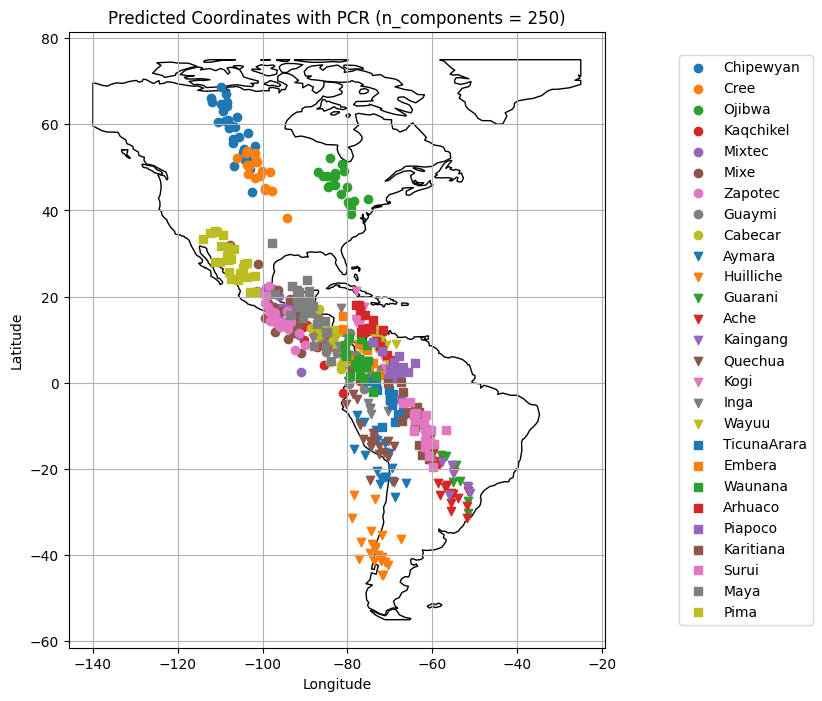

In [110]:
from sklearn.preprocessing import StandardScaler

n = 250
pipeline = make_pipeline(StandardScaler(), PCA(n_components=n), LinearRegression())
pipeline.fit(X, y)
y_pred = pipeline.predict(X)


# Convert to GeoDataFrame for visualization
gdf_pred = gpd.GeoDataFrame({'tribe': tribes,
    'pred_lat': y_pred[:, 0],
    'pred_long': y_pred[:, 1]}, geometry=gpd.points_from_xy(y_pred[:, 1],y_pred[:, 0]))


# Plotting the world map with the predicted coordinates
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
fig, ax = plt.subplots(figsize=(8, 8))
world.clip([-140, -55, -25, 75]).plot(ax=ax, color='white', edgecolor='black')

# Define marker shapes and colors
marker_list = ['o', 'v', 's']
colors_list = [f'C{i}' for i in range(9)]

# Plot the predicted coordinates for each tribe
for i, tribe in enumerate(gdf_pred['tribe'].unique()):
    members = gdf_pred[gdf_pred['tribe'] == tribe]
    ax.scatter(members['pred_long'], members['pred_lat'],
               marker=marker_list[i // 9],  # Rotate through marker shapes
               color=colors_list[i % 9],    # Rotate through colors
               label=tribe)

ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax.set_title(f'Predicted Coordinates with PCR (n_components = {n})')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)
plt.show()


## ▶️ Exercise 6: Conclusion (2 points)

Propose a conclusion to your study. You can write a paragraph about the quality of predictors versus the number of factors, possible improvements to the approach (for instance, showing what happens when using [partial least squares](https://scikit-learn.org/1.5/auto_examples/cross_decomposition/plot_pcr_vs_pls.html) instead of PCR), comment on the performance of the regression in predictions for each country separately, etc. Note that we expect a thorough presentation of the final predictive model as well as an interpretation of it, not simply a bunch of `python` code lines.

#### Geolocation Prediction Using Principal Component Regression: Optimizing Dimensionality Reduction for Improved Accuracy
This study aimed to predict individual geographical coordinates using Principal Component Regression (PCR) while optimizing the number of principal components through cross-validation. Our analysis showed that the choice of n_components significantly influences model performance: too few components lead to underfitting, whereas too many may introduce unnecessary noise, reducing generalization capabilities. The optimal balance, found around 250 components, resulted in a reasonable trade-off between training and test errors, with a final prediction error around 500 km.

Despite its effectiveness, PCR has limitations. One possible improvement involves using Partial Least Squares (PLS), which considers the response variable while selecting principal components, potentially leading to better predictive power. Another aspect to explore is country-specific prediction performance, as regional data distributions may differ, warranting stratified or hierarchical modeling approaches.

Additionally, alternative regression techniques such as nonlinear models (e.g., Gaussian Processes, Neural Networks) or spatially-aware methods (e.g., Kriging, Geostatistics) could be tested to capture complex geographic variations more effectively. These refinements could further improve predictive accuracy and robustness.

Ultimately, this study highlights the effectiveness of dimensionality reduction techniques in geolocation prediction and underscores the importance of selecting an appropriate number of components to balance bias and variance.

For this lab(TP2), we employed Principal Component Analysis (PCA) followed by regression, even though the input variables are binary. This approach simplifies the model and avoids overfitting, compared to the direct linear regression approach used in TP1, where one-hot encoding was applied to the binary variables. Using PCA helps reduce complexity by transforming correlated input features into uncorrelated principal components. However, it does not account for potential correlations between the input features directly, which could be a limitation in certain contexts.
